# SVM methods comparison

## Dataset
Sythetic binary classification data with 100000 samples and 15 features is created. Of the 15 features, only 2 are informative, 2 are redundant (random combinations of the informative features) and the remaining 11 are uninformative (random numbers). Of the 100,000 samples, 1000 will be used for model fitting and the remaining for testing.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features= 15, n_informative=2, n_redundant=2, random_state=42
)

train_samples = 1000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=100_000 - train_samples,
)

## SVC vs. LinearSVC
SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods but have different mathematical formulation, the former is the traditional SVM formulation with objective function as 1/2W^2+C\xi, whilt the latter reparameterization the C to control the number of support vector and margin errors (points lies on the wrong side of its margin boundary). The libsvm inbuilt Platt scaling/logistic calibration method is used when option probability is set to True. They both implement “one-vs-one” approach for multi-class classification.

On the other hand, LinearSVC is a faster implementation of SVM when the kernal is linear, the library liblinear is much more efficient and can scale almost linearly to millions of samples and/or features. It implement “one-vs-the-rest” multi-class strategy. There exist one more strategy as multi_class='crammer_singer' for LinearSVC.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


lgr = LogisticRegression(C=1, solver='lbfgs')
svc = SVC(kernel = 'linear', max_iter=10000, probability=True)
nusvc = NuSVC(kernel = 'linear', probability=True)
linearsvc = LinearSVC()

probs_lgr = lgr.fit(X_train, y_train).predict_proba(X_test)[:,1]

preds_svc = svc.fit(X_train, y_train).predict(X_test)
probs_svc = svc.decision_function(X_test)
probs_svc = (probs_svc - probs_svc.min()) / (probs_svc.max() - probs_svc.min())

preds_nusvc = nusvc.fit(X_train, y_train).predict(X_test)
probs_nusvc = nusvc.decision_function(X_test)
probs_nusvc = (probs_nusvc - probs_nusvc.min()) / (probs_nusvc.max() - probs_nusvc.min())

preds_linearsvc = linearsvc.fit(X_train, y_train).predict(X_test)
probs_linearsvc = linearsvc.decision_function(X_test)
probs_linearsvc = (probs_linearsvc - probs_linearsvc.min()) / (probs_linearsvc.max() - probs_linearsvc.min())

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


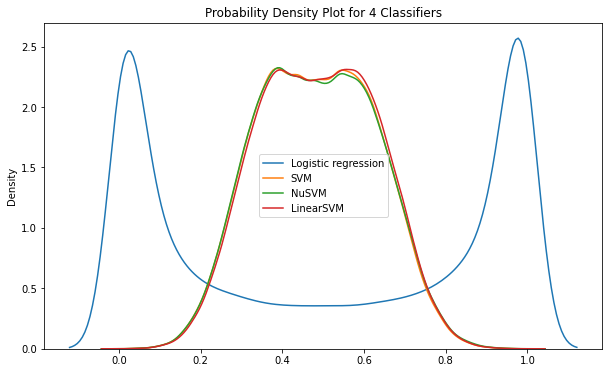

In [3]:
# probability density
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgr, label='Logistic regression')
sns.kdeplot(probs_svc, label='SVM')
sns.kdeplot(probs_nusvc, label='NuSVM')
sns.kdeplot(probs_linearsvc, label='LinearSVM')
plt.legend()
plt.title("Probability Density Plot for 4 Classifiers")
plt.show()

C:\Users\wangu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


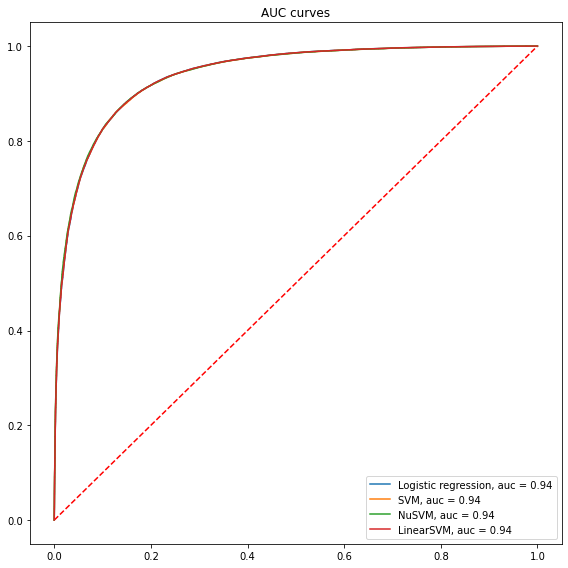

In [7]:
# auc curve
from sklearn import metrics

fig, roc_curve = plt.subplots(figsize=(8, 8))
# Add ROC curve
roc_curve.plot([0, 1], [0, 1],'r--')
clf_list = [(lgr, 'Logistic regression'), (svc, 'SVM'), (nusvc, 'NuSVM'), (linearsvc, 'LinearSVM')]


for _, (clf, name) in enumerate(clf_list):
    #row, col = grid_positions[i]
    #ax = fig.add_subplot(gs[row, col])
    
    clf.fit(X_train, y_train)
    if name in  ['SVM', 'NuSVM', 'LinearSVM']:
        prob = clf.decision_function(X_test)
    else:
        prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, prob)
    auc = metrics.roc_auc_score(y_test, prob)
    roc_curve.plot(fpr, tpr, label= name+f', auc = {str(round(auc,3))}')
plt.legend()
roc_curve.set_title('AUC curves')
plt.tight_layout()
plt.show()